In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [87]:
housing_df = pd.read_csv('housing.csv')

In [88]:
df = housing_df

In [89]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [90]:
from sklearn import tree


In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()

In [93]:
df['MEDV'] = le.fit_transform(df['MEDV'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV',axis=1), df['MEDV'], test_size=0.25, random_state=42)

In [95]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [96]:
model = clf.fit(X_train, y_train)

In [97]:
pred = model.predict(X_test)

In [98]:
import sklearn
sklearn.metrics.accuracy_score(y_test, pred)

0.023622047244094488

In [99]:
frame = { 'FeatureImportance': model.feature_importances_, 'Feature': X_train.columns }
result = pd.DataFrame(frame)
result.sort_values(by='FeatureImportance', ascending=False).head(10)

,FeatureImportance,Feature
12,0.406010,LSTAT
5,0.295904,RM
10,0.153881,PTRATIO
7,0.144205,DIS
0,0.000000,CRIM
1,0.000000,ZN
2,0.000000,INDUS
3,0.000000,CHAS
4,0.000000,NOX
6,0.000000,AGE


Метод кластеризации, очевидно, не подходит

In [100]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [101]:
df.MEDV.describe()


count    506.000000
mean     110.699605
std       58.400433
min        0.000000
25%       68.250000
50%      110.000000
75%      146.000000
max      228.000000
Name: MEDV, dtype: float64

In [102]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

print(mean_squared_error(y_test, pred, squared=True))

779.9314008054108


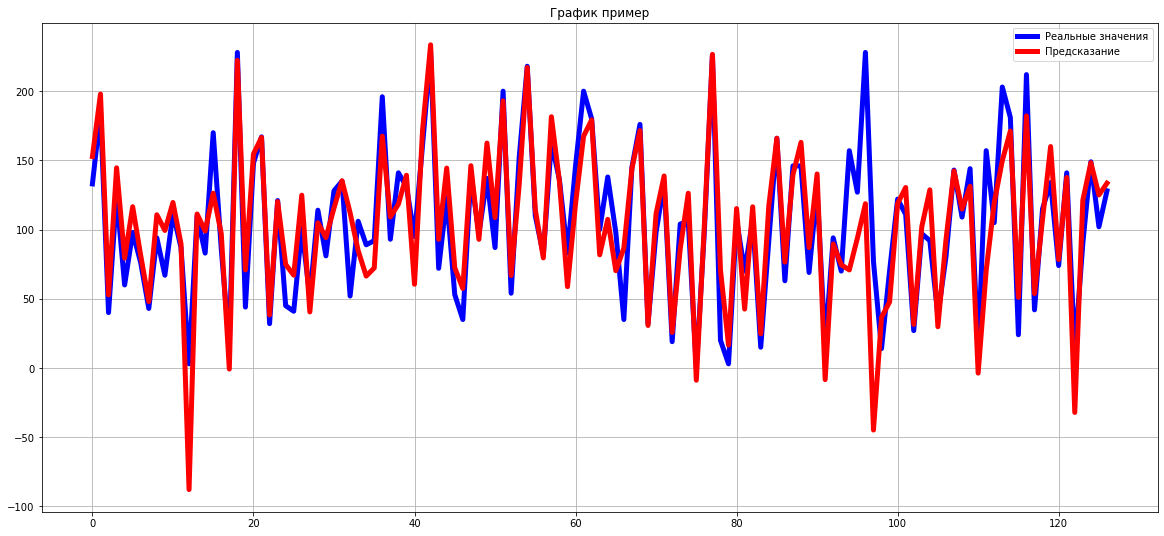

In [103]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения')
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("График пример")
plt.grid(True)
plt.show()